<a href="https://colab.research.google.com/github/rajeshsahu09/Abstractive-Summarization-With-Attention-on-amazon-fine-food-review/blob/master/AeroFitCaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#DataSet EDA

In [2]:
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/\
000/001/125/original/aerofit_treadmill.csv")
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


* 180 rows X 9 cols
## - **No missing entries.**

- **Data set desc**
 - Product Purchased:	KP281, KP481, or KP781
 - Age:	In years
 - Gender:	Male/Female
 - Education:	In years
 - MaritalStatus:	Single or partnered
 - Usage:	The average number of times the customer plans to use the treadmill each week.
 - Income:	Annual income (in $)
 - Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
 - Miles:	The average number of miles the customer expects to walk/run each week


In [4]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [5]:
df.describe(include=object)

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


- Most frequent product is KP281.
- Dataset has only 3 types of products.
- Dataset has most number of entries for Male.
- ~60% of the entries are married.

##Outlier Detection 

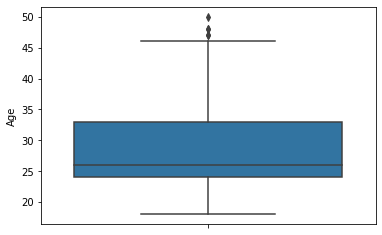

In [6]:
"""
Age	Education	Usage	Fitness	Income	Miles
"""
sns.boxplot(data = df, y = 'Age', hue='Gender')
plt.show()

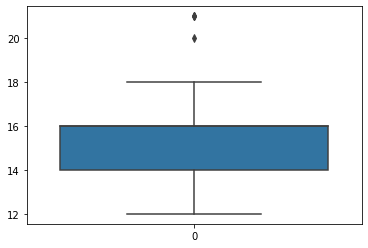

In [7]:
sns.boxplot(data = df['Education'])
plt.show()

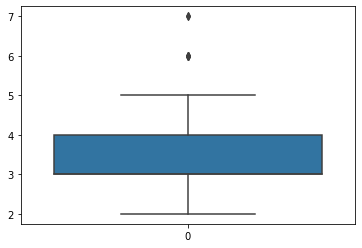

In [8]:
sns.boxplot(data = df['Usage'])
plt.show()

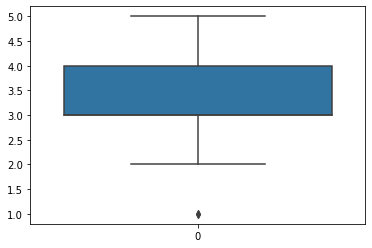

In [9]:
sns.boxplot(data = df['Fitness'])
plt.show()

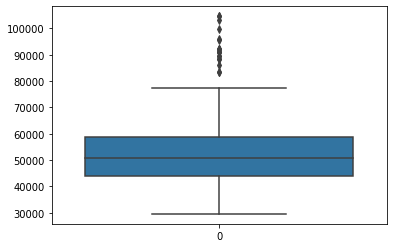

In [10]:
sns.boxplot(data = df['Income'])
plt.show()

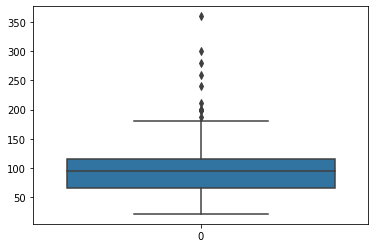

In [11]:
sns.boxplot(data = df['Miles'])
plt.show()

## Effect on product purchase

- Marital status vs Product

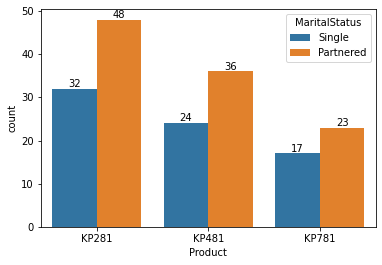

In [12]:
ax = sns.countplot(data = df, x = 'Product', hue = 'MaritalStatus')
for container in ax.containers: #matplotlib v3.4.0 or higher
    ax.bar_label(container)
plt.show()

- Atleast ~66% of the married ones purchase more products than single

- Age vs Purchage

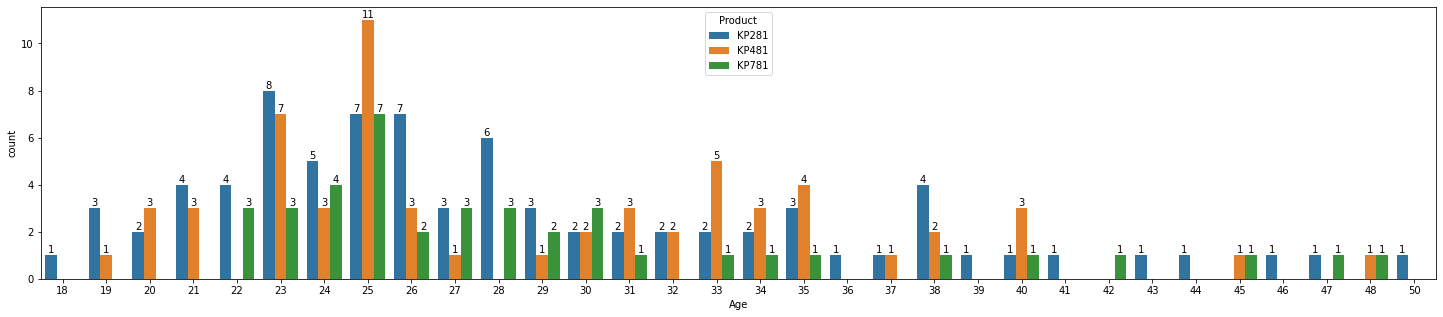

In [13]:
plt.figure(figsize=(25, 5))
ax = sns.countplot(data = df, x = 'Age', hue = 'Product')
for container in ax.containers: #matplotlib v3.4.0 or higher
    ax.bar_label(container)
plt.show()

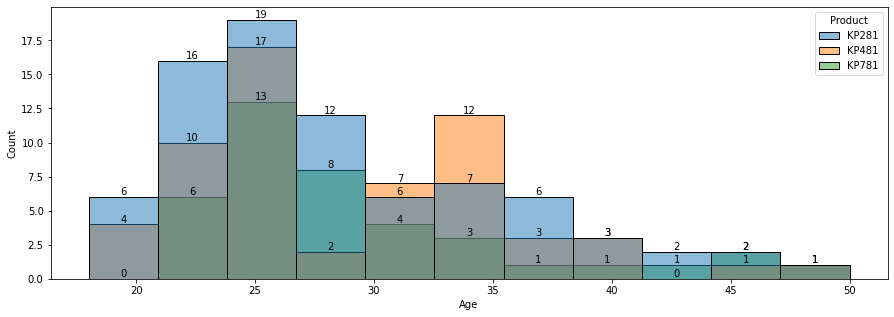

In [14]:
plt.figure(figsize=(15, 5))
ax = sns.histplot(data = df, bins='auto', x = 'Age', hue = 'Product')
for container in ax.containers: #matplotlib v3.4.0 or higher
    ax.bar_label(container)

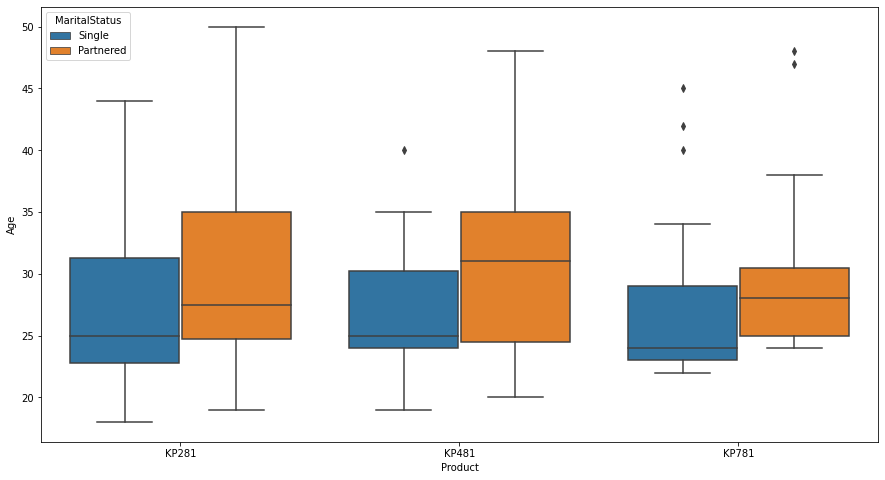

In [15]:
"""
Distibution of Product vs Age on Marital status
"""
plt.figure(figsize=(15, 8))
sns.boxplot(data = df, hue = 'MaritalStatus', y = 'Age', x = 'Product')
plt.show()

- All 3 products purchase count is equally likely for age group ~25

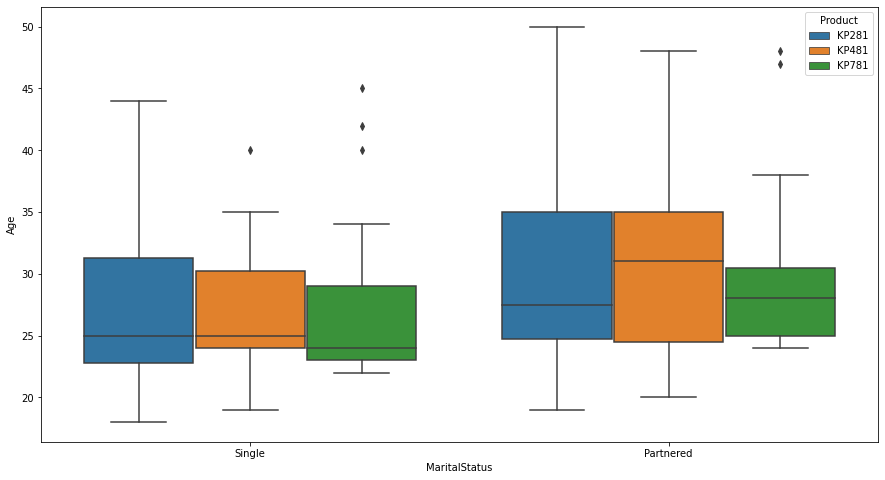

In [16]:
"""
Distibution of Marital Status vs Age on Product
"""
plt.figure(figsize=(15, 8))
sns.boxplot(data = df, x = 'MaritalStatus', y = 'Age', hue = 'Product')
plt.show()

- Single fellows of age 22 to 32 years purchage all 3 products.
- Couples more than 30 years tend to like product KP481 more than other 2.
- 75% of all the customer are between age [22 to 35]

<Figure size 1440x1440 with 0 Axes>

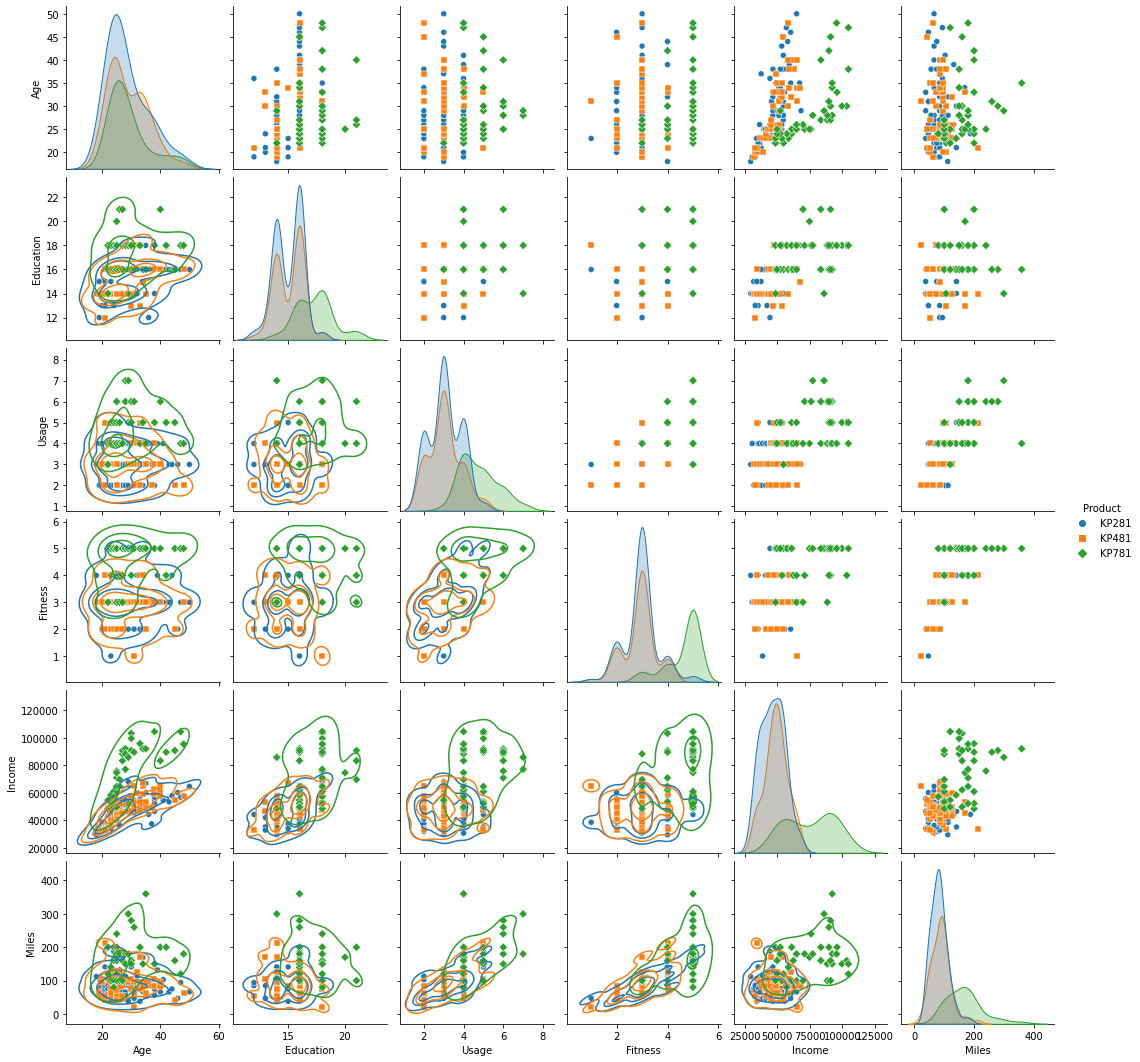

In [17]:
plt.figure(figsize=(20, 20))
g = sns.pairplot(data = df, hue='Product', markers=["o", "s", "D"])
g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.xticks(rotation=70)
plt.show()

##Marginal Probability CrossTab

> Product vs Gender






<Figure size 720x360 with 0 Axes>

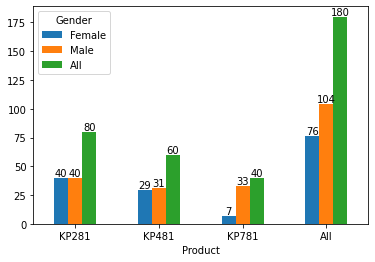

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [18]:
plt.figure(figsize=(10, 5))
crosstb = pd.crosstab(index=df['Product'], columns=df['Gender'], margins=True)
ax = crosstb.plot.bar(rot=0)
for container in ax.containers: #matplotlib v3.4.0 or higher
    ax.bar_label(container)
plt.show()
crosstb

> Probability Male or Female upon Total Product purchased 

Probability of Male and Female with respect to each product purchased


<Figure size 720x360 with 0 Axes>

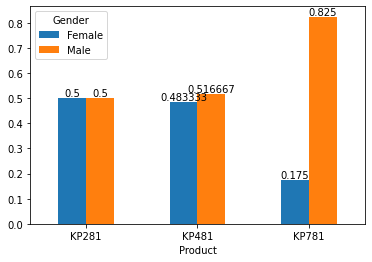

Gender,Female,Male
Product,,
KP281,0.500000,0.500000
KP481,0.483333,0.516667
KP781,0.175000,0.825000


In [19]:
plt.figure(figsize=(10, 5))
print('Probability of Male and Female with respect to each product purchased')
crosstb = pd.crosstab(index=df['Product'], columns=df['Gender'], \
                      normalize='index')
ax = crosstb.plot.bar(rot=0)
for container in ax.containers: #matplotlib v3.4.0 or higher
    ax.bar_label(container)
plt.show()
crosstb

> Probability Product purchased upon Total Male or Female 

Probability of each product purchased with respect to Male and Female


<Figure size 720x360 with 0 Axes>

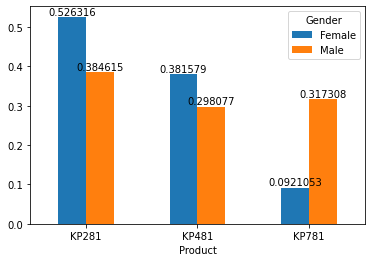

Gender,Female,Male
Product,,
KP281,0.526316,0.384615
KP481,0.381579,0.298077
KP781,0.092105,0.317308


In [20]:
plt.figure(figsize=(10, 5))
print('Probability of each product purchased with respect to Male and Female')
crosstb = pd.crosstab(index=df['Product'], columns=df['Gender'], \
                      normalize='columns')
ax = crosstb.plot.bar(rot=0)
for container in ax.containers: #matplotlib v3.4.0 or higher
    ax.bar_label(container)
plt.show()
crosstb

> Product vs Marital Status

<Figure size 720x360 with 0 Axes>

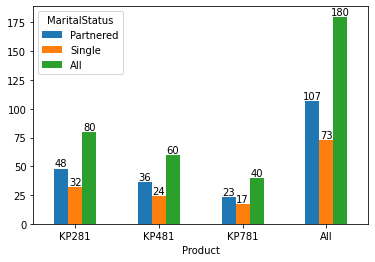

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


In [21]:
plt.figure(figsize=(10, 5))
crosstb = pd.crosstab(index=df['Product'], columns=df['MaritalStatus'], \
                      margins=True)
ax = crosstb.plot.bar(rot=0)
for container in ax.containers: #matplotlib v3.4.0 or higher
    ax.bar_label(container)
plt.show()
crosstb

Probability of MaritalStatus with respect to each product purchased


<Figure size 720x360 with 0 Axes>

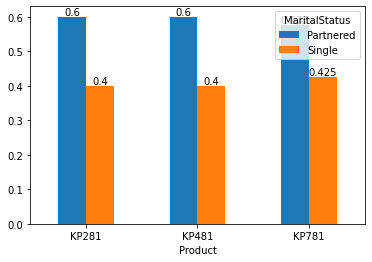

MaritalStatus,Partnered,Single
Product,,
KP281,0.600,0.400
KP481,0.600,0.400
KP781,0.575,0.425


In [22]:
plt.figure(figsize=(10, 5))
print('Probability of MaritalStatus with respect to each product purchased')
crosstb = pd.crosstab(index=df['Product'], columns=df['MaritalStatus'], \
                      normalize='index')
ax = crosstb.plot.bar(rot=0)
for container in ax.containers: #matplotlib v3.4.0 or higher
    ax.bar_label(container)
plt.show()
crosstb

Probability of each product purchased with respect to MaritalStatus


<Figure size 720x360 with 0 Axes>

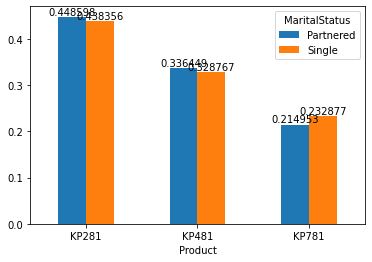

MaritalStatus,Partnered,Single
Product,,
KP281,0.448598,0.438356
KP481,0.336449,0.328767
KP781,0.214953,0.232877


In [23]:
plt.figure(figsize=(10, 5))
print('Probability of each product purchased with respect to MaritalStatus')
crosstb = pd.crosstab(index=df['Product'], columns=df['MaritalStatus'], \
                      normalize='columns')
ax = crosstb.plot.bar(rot=0)
for container in ax.containers: #matplotlib v3.4.0 or higher
    ax.bar_label(container)
plt.show()
crosstb

#Recommendations 

<AxesSubplot: xlabel='Product', ylabel='count'>

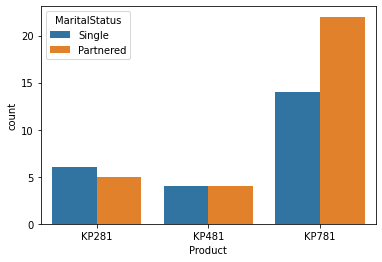

In [24]:
sns.countplot(data = df[(df['Fitness'] >= 4) & (df['Usage'] >= 3)], \
              x = 'Product', hue = 'MaritalStatus')

- Gender does not affect KP781 popularity
- People whose weekly treadmill usage freq is >=3 and rated >=4 are using KP781.

Hence KP781 production can be increased as popular among people.